In [2]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt

alt.renderers.enable('default')


RendererRegistry.enable('default')

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/melaniewalsh/responsible-datasets-in-context/main/datasets/top-500-novels/library_top_500.csv", sep=',', header=0, low_memory=False)
df

,top_500_rank,title,author,pub_year,orig_lang,genre,author_birth,author_death,author_gender,author_primary_lang,...,gr_num_ratings,gr_num_reviews,gr_avg_rating_rank,gr_num_ratings_rank,oclc_owi,author_viaf,gr_url,wiki_url,pg_eng_url,pg_orig_url
0,1,Don Quixote,Miguel de Cervantes,1605,Spanish,action,1547,1616,male,spa,...,"269,435","12,053",318,211,1.810748e+09,17220427,https://www.goodreads.com/book/show/3836.Don_Q...,https://en.wikipedia.org/wiki/Don_Quixote,https://www.gutenberg.org/cache/epub/996/pg996...,https://www.gutenberg.org/cache/epub/2000/pg20...
1,2,Alice's Adventures in Wonderland,Lewis Carroll,1865,English,fantasy,1832,1898,male,eng,...,"561,016","15,380",172,133,1.156132e+10,66462036,https://www.goodreads.com/book/show/24213.Alic...,https://en.wikipedia.org/wiki/Alice%27s_Advent...,https://www.gutenberg.org/cache/epub/11/pg11.txt,NaN
2,3,The Adventures of Huckleberry Finn,Mark Twain,1884,English,action,1835,1910,male,eng,...,"1,262,480","19,440",373,68,3.373178e+09,50566653,https://www.goodreads.com/book/show/2956.The_A...,https://en.wikipedia.org/wiki/Adventures_of_Hu...,https://www.gutenberg.org/cache/epub/76/pg76.txt,NaN
3,4,The Adventures of Tom Sawyer,Mark Twain,1876,English,action,1835,1910,male,eng,...,"931,898","13,603",301,88,3.373178e+09,50566653,https://www.goodreads.com/book/show/24583.The_...,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.gutenberg.org/cache/epub/74/pg74.txt,NaN
4,5,Treasure Island,Robert Louis Stevenson,1883,English,action,1850,1894,male,eng,...,"486,155","16,307",368,145,3.434000e+03,95207986,https://www.goodreads.com/book/show/295.Treasu...,https://en.wikipedia.org/wiki/Treasure_Island,https://www.gutenberg.org/cache/epub/120/pg120...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,496,Stranger in a Strange Land,Robert A. Heinlein,1961,English,scifi,1907,1988,male,eng,...,"311,859","9,961",310,190,7.894120e+05,12309757,NaN,https://en.wikipedia.org/wiki/Stranger_in_a_St...,NA_not-pub-domain,NaN
496,497,Vision in White,Nora Roberts,2009,English,romance,1965,ALIVE,female,eng,...,"138,445","4,652",128,277,1.559638e+08,66448023,NaN,https://en.wikipedia.org/wiki/Vision_in_White,NA_not-pub-domain,NaN
497,498,The Whipping Boy,Sid Fleischman,1986,English,action,1920,2010,male,eng,...,"27,444","1,623",476,445,4.415520e+08,66438084,NaN,https://en.wikipedia.org/wiki/The_Whipping_Boy,NA_not-pub-domain,NaN
498,499,Room,Emma Donoghue,2010,English,na,1969,ALIVE,female,eng,...,"801,989","50,594",171,101,4.859780e+08,39539889,NaN,https://en.wikipedia.org/wiki/Room_(novel),NA_not-pub-domain,NaN


In [4]:
# i first started off by copying the entire colab notebook into this, and then I do my own work

lang_counts = df['orig_lang'].value_counts()

df_filtered = df[df['orig_lang'].isin(lang_counts[lang_counts >= 2].index)]
df_filtered[:10]

,top_500_rank,title,author,pub_year,orig_lang,genre,author_birth,author_death,author_gender,author_primary_lang,...,gr_num_ratings,gr_num_reviews,gr_avg_rating_rank,gr_num_ratings_rank,oclc_owi,author_viaf,gr_url,wiki_url,pg_eng_url,pg_orig_url
0,1,Don Quixote,Miguel de Cervantes,1605,Spanish,action,1547,1616,male,spa,...,"269,435","12,053",318,211,1.810748e+09,17220427,https://www.goodreads.com/book/show/3836.Don_Q...,https://en.wikipedia.org/wiki/Don_Quixote,https://www.gutenberg.org/cache/epub/996/pg996...,https://www.gutenberg.org/cache/epub/2000/pg20...
1,2,Alice's Adventures in Wonderland,Lewis Carroll,1865,English,fantasy,1832,1898,male,eng,...,"561,016","15,380",172,133,1.156132e+10,66462036,https://www.goodreads.com/book/show/24213.Alic...,https://en.wikipedia.org/wiki/Alice%27s_Advent...,https://www.gutenberg.org/cache/epub/11/pg11.txt,NaN
2,3,The Adventures of Huckleberry Finn,Mark Twain,1884,English,action,1835,1910,male,eng,...,"1,262,480","19,440",373,68,3.373178e+09,50566653,https://www.goodreads.com/book/show/2956.The_A...,https://en.wikipedia.org/wiki/Adventures_of_Hu...,https://www.gutenberg.org/cache/epub/76/pg76.txt,NaN
3,4,The Adventures of Tom Sawyer,Mark Twain,1876,English,action,1835,1910,male,eng,...,"931,898","13,603",301,88,3.373178e+09,50566653,https://www.goodreads.com/book/show/24583.The_...,https://en.wikipedia.org/wiki/The_Adventures_o...,https://www.gutenberg.org/cache/epub/74/pg74.txt,NaN
4,5,Treasure Island,Robert Louis Stevenson,1883,English,action,1850,1894,male,eng,...,"486,155","16,307",368,145,3.434000e+03,95207986,https://www.goodreads.com/book/show/295.Treasu...,https://en.wikipedia.org/wiki/Treasure_Island,https://www.gutenberg.org/cache/epub/120/pg120...,NaN
5,6,Pride and Prejudice,Jane Austen,1813,English,romance,1775,1817,female,eng,...,"4,239,555","113,241",34,8,1.881837e+09,102333412,https://www.goodreads.com/book/show/1885.Pride...,https://en.wikipedia.org/wiki/Pride_and_Prejudice,https://www.gutenberg.org/cache/epub/1342/pg13...,NaN
6,7,Wuthering Heights,Emily Brontë,1847,English,na,1818,1848,female,eng,...,"1,793,015","61,175",326,46,4.973900e+04,97097302,https://www.goodreads.com/book/show/6185.Wuthe...,https://en.wikipedia.org/wiki/Wuthering_Heights,https://www.gutenberg.org/cache/epub/768/pg768...,NaN
7,8,Jane Eyre,Charlotte Brontë,1847,English,romance,1816,1855,female,eng,...,"2,084,999","64,277",99,40,3.503000e+03,71388025,https://www.goodreads.com/book/show/10210.Jane...,https://en.wikipedia.org/wiki/Jane_Eyre,https://www.gutenberg.org/cache/epub/1260/pg12...,NaN
8,9,Moby Dick,Herman Melville,1851,English,na,1819,1891,male,eng,...,"557,743","22,513",481,134,2.453386e+09,27068555,https://www.goodreads.com/book/show/153747.Mob...,https://en.wikipedia.org/wiki/Moby-Dick,https://www.gutenberg.org/cache/epub/2701/pg27...,NaN
9,10,The Scarlet Letter,Nathaniel Hawthorne,1850,English,na,1804,1864,male,eng,...,"862,399","20,214",493,95,3.277000e+03,44435463,https://www.goodreads.com/book/show/12296.The_...,https://en.wikipedia.org/wiki/The_Scarlet_Letter,https://www.gutenberg.org/cache/epub/25344/pg2...,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
top_500_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02
pub_year,500.0,1.932132e+03,8.430655e+01,1021.00,1900.00,1948.00,1.989000e+03,2.015000e+03
oclc_holdings,495.0,1.040144e+04,5.694509e+03,996.00,6800.00,8318.00,1.218400e+04,3.770200e+04
oclc_eholdings,495.0,2.218594e+03,3.084596e+03,25.00,352.00,558.00,3.223000e+03,1.554500e+04
oclc_total_editions,495.0,8.966424e+02,1.019016e+03,21.00,241.00,485.00,1.207500e+03,9.017000e+03
oclc_holdings_rank,495.0,2.480000e+02,1.430385e+02,1.00,124.50,248.00,3.715000e+02,4.950000e+02
oclc_editions_rank,495.0,2.480000e+02,1.430385e+02,1.00,124.50,248.00,3.715000e+02,4.950000e+02
gr_avg_rating,500.0,3.971440e+00,2.276875e-01,3.29,3.83,3.98,4.120000e+00,4.620000e+00
gr_avg_rating_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02
gr_num_ratings_rank,500.0,2.505000e+02,1.444818e+02,1.00,125.75,250.50,3.752500e+02,5.000000e+02


In [6]:
df["author_gender"].value_counts(dropna=False)

male      354
female    145
NaN         1
Name: author_gender, dtype: int64

In [7]:
df["author"].value_counts(dropna=False).head(10)

John Grisham            19
Charles Dickens         15
John Steinbeck           8
C.S. Lewis               8
Nicholas Sparks          7
Laura Ingalls Wilder     7
Stephen King             7
J.K. Rowling             7
Dan Brown                5
James Patterson          5
Name: author, dtype: int64

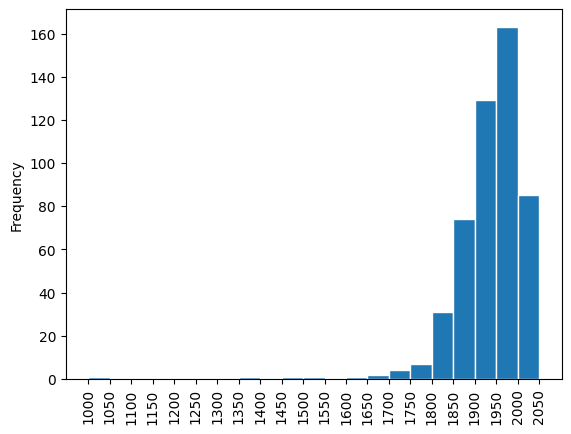

In [8]:
import numpy as np

bins = np.arange(1000, 2060, 50)
bars = df['pub_year'].plot.hist(bins=bins, edgecolor='w')
plt.xticks(rotation='vertical');
plt.xticks(bins);

In [9]:
from IPython.display import display

print("Oldest Book(s):")
display(df[df["pub_year"]==df["pub_year"].min()])
print("Newest Book(s):")
display(df[df["pub_year"]==df["pub_year"].max()])

Oldest Book(s):


,top_500_rank,title,author,pub_year,orig_lang,genre,author_birth,author_death,author_gender,author_primary_lang,...,gr_num_ratings,gr_num_reviews,gr_avg_rating_rank,gr_num_ratings_rank,oclc_owi,author_viaf,gr_url,wiki_url,pg_eng_url,pg_orig_url
137,138,The Tale of Genji,Murasaki Shikibu,1021,Japanese,na,978?,1016?,female,jpn,...,"13,275","1,385",430,477,4.739790e+09,95154208,https://www.goodreads.com/book/show/7042.The_T...,https://en.wikipedia.org/wiki/The_Tale_of_Genji,https://www.gutenberg.org/cache/epub/66057/pg6...,unavailable


Newest Book(s):


,top_500_rank,title,author,pub_year,orig_lang,genre,author_birth,author_death,author_gender,author_primary_lang,...,gr_num_ratings,gr_num_reviews,gr_avg_rating_rank,gr_num_ratings_rank,oclc_owi,author_viaf,gr_url,wiki_url,pg_eng_url,pg_orig_url
401,402,The Girl on the Train,Paula Hawkins,2015,English,na,1972,ALIVE,female,eng,...,"2,924,281","126,289",275,26,1.893823e+09,14277202,https://www.goodreads.com/book/show/22557272-t...,https://en.wikipedia.org/wiki/The_Girl_on_the_...,NA_not-pub-domain,NaN
480,481,Go Set a Watchman,Harper Lee,2015,English,na,1926,2016,female,eng,...,"272,837","32,622",498,209,2.283979e+09,12431460,NaN,https://en.wikipedia.org/wiki/Go_Set_a_Watchman,NA_not-pub-domain,NaN


In [10]:
df["author_nationality"].value_counts().head(5)

US    257
GB    148
FR     27
RU     10
DE     10
Name: author_nationality, dtype: int64

In [11]:
def top_5_comparison(col_name):
  print(df[["title", "author", "top_500_rank", col_name]].head(5))

  sorted = df.sort_values(by=[col_name])
  print(sorted[["title", "author", "top_500_rank", col_name]].head(5))

top_5_comparison("gr_num_ratings_rank")

                                title                  author  top_500_rank  \
0                         Don Quixote     Miguel de Cervantes             1   
1    Alice's Adventures in Wonderland           Lewis Carroll             2   
2  The Adventures of Huckleberry Finn              Mark Twain             3   
3        The Adventures of Tom Sawyer              Mark Twain             4   
4                     Treasure Island  Robert Louis Stevenson             5   

   gr_num_ratings_rank  
0                  211  
1                  133  
2                   68  
3                   88  
4                  145  
                                     title               author  top_500_rank  \
44   Harry Potter and the Sorcerer's Stone         J.K. Rowling            45   
172                       The Hunger Games      Suzanne Collins           173   
131                               Twilight      Stephenie Meyer           132   
28                   To Kill a Mockingbird         

In [12]:
import math

def print_rankings(d, col_name):
    rank_B = d[col_name]
    rank_A = d["top_500_rank"]
    title = d["title"]
    points_moved = 0
    if (math.isnan(rank_B)):
      points_moved = 501
    else:
      if rank_B > int(rank_A):
          points_moved = rank_B - rank_A
          print(f"\u001b[31m ▼ -{int(points_moved)} {title}")
      elif rank_B < rank_A:
          points_moved = rank_A - rank_B
          print(f"\u001b[32m ▲ +{int(points_moved)} {title}")
      else:
          print(f"\u001b[30m ● {int(points_moved)} {title}")
    d["points_moved"] = int(points_moved)
    return d

df = df.apply(lambda d: print_rankings(d, "gr_num_ratings_rank"), axis=1)

 ▼ -210 Don Quixote
 ▼ -131 Alice's Adventures in Wonderland
 ▼ -65 The Adventures of Huckleberry Finn
 ▼ -84 The Adventures of Tom Sawyer
 ▼ -140 Treasure Island
 ▼ -2 Pride and Prejudice
 ▼ -39 Wuthering Heights
 ▼ -32 Jane Eyre
 ▼ -125 Moby Dick
 ▼ -85 The Scarlet Letter
 ▼ -197 Gulliver's Travels
 ▼ -266 The Pilgrim's Progress
 ▼ -85 A Christmas Carol
 ▼ -214 David Copperfield
 ▼ -71 A Tale of Two Cities
 ▼ -22 Little Women
 ▼ -86 Great Expectations
 ▲ +8 The Hobbit, or, There and Back Again
 ▼ -35 Frankenstein, or, the Modern Prometheus
 ▼ -149 Oliver Twist
 ▼ -209 Uncle Tom's Cabin
 ▼ -72 Crime and Punishment
 ▼ -159 Madame Bovary: Patterns of Provincial life
 ▼ -69 The Return of the King
 ▼ -42 Dracula
 ▼ -160 The Three Musketeers
 ▼ -16 Brave New World
 ▼ -155 War and Peace
 ▲ +25 To Kill a Mockingbird
 ▼ -122 The Wizard of Oz
 ▼ -73 Les Misérables
 ▼ -43 The Secret Garden
 ▲ +21 Animal Farm
 ▲ +29 The Great Gatsby
 ▼ -4 The Little Prince
 ▼ -124 The Call of the Wild
 ▼ -444 20

In [13]:
sorted = df.sort_values(by=['points_moved'])
print(sorted[["title", "author", "points_moved", "top_500_rank", "gr_num_ratings_rank"]].head(10).to_string(index=False))

                        title                   author  points_moved  top_500_rank  gr_num_ratings_rank
 The Winter of Our Discontent           John Steinbeck             0           397                  397
Little House In the Big Woods     Laura Ingalls Wilder             1           214                  213
          Pride and Prejudice              Jane Austen             2             6                    8
                 First Family           David Baldacci             3           400                  403
                  Howards End             E.M. Forster             4           340                  336
            The Little Prince Antoine de Saint-Exupéry             4            35                   39
              Call It Courage         Armstrong Sperry             5           480                  475
       The Incredible Journey          Sheila Burnford             5           387                  392
                      Rebecca        Daphne Du Maurier          

In [14]:
sorted = df.sort_values(by=['points_moved'], ascending=False)
print(sorted[["title", "author", "points_moved", "top_500_rank", "gr_num_ratings_rank"]].head(10).to_string(index=False))

                                      title           author  points_moved  top_500_rank  gr_num_ratings_rank
               20,000 Leagues Under the Sea      Jules Verne           444            37                  481
     Harry Potter and the Half-Blood Prince     J.K. Rowling           429           447                   18
                        The Sea of Monsters     Rick Riordan           419           495                   76
                     The Vicar of Wakefield Oliver Goldsmith           405            80                  485
                         Looking for Alaska       John Green           403           456                   53
                                       Room    Emma Donoghue           398           499                  101
Miss Peregrine's Home for Peculiar Children     Ransom Riggs           384           453                   69
                            Deception Point        Dan Brown           378           500                  122
          

In [15]:
df['points_moved'].mean()

137.016

PearsonRResult(statistic=0.3089825159300637, pvalue=1.601761116200545e-12)
PearsonRResult(statistic=0.7642639335763275, pvalue=5.6541076909547544e-96)
PearsonRResult(statistic=0.6985608812420623, pvalue=1.1165447422670264e-73)


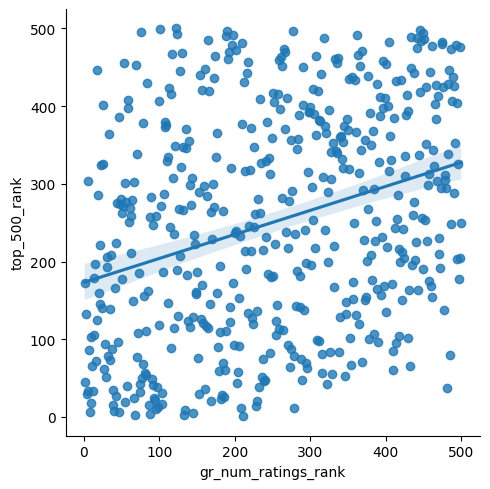

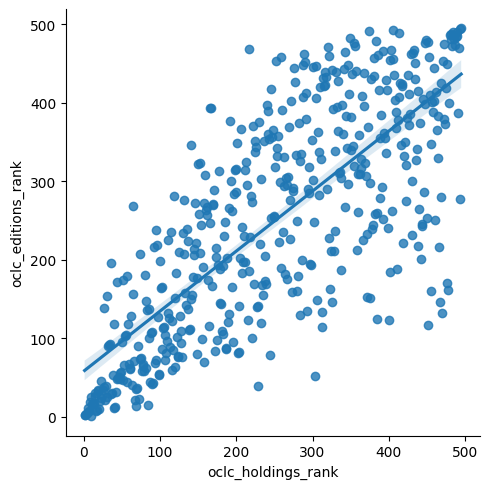

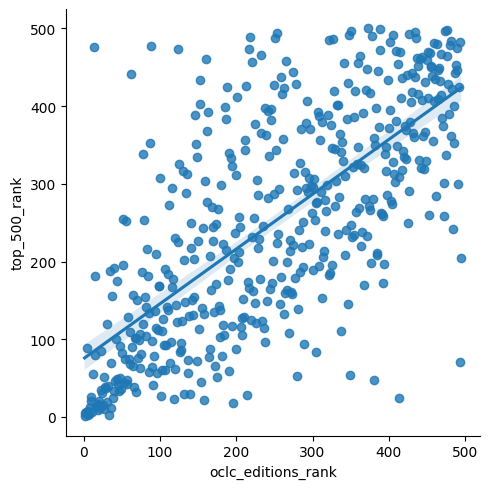

In [16]:
import seaborn as sns
from scipy import stats
# inspired by: https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/08_correlation.html

sns.lmplot(x="gr_num_ratings_rank", y="top_500_rank", data=df)
print(stats.pearsonr(df['gr_num_ratings_rank'], df['top_500_rank']))

sns.lmplot(x="oclc_holdings_rank", y="oclc_editions_rank", data=df)
dropped_df = df[df.oclc_editions_rank.notna() & df.oclc_holdings_rank.notna()]
print(stats.pearsonr(dropped_df['oclc_holdings_rank'], dropped_df['oclc_editions_rank']))

sns.lmplot(x="oclc_editions_rank", y="top_500_rank", data=df)
dropped_df = df[df.oclc_editions_rank.notna()]
print(stats.pearsonr(dropped_df['oclc_editions_rank'], dropped_df['top_500_rank']))

In [17]:
df = df.apply(lambda d: print_rankings(d, "oclc_editions_rank"), axis=1)

 ● 0 Don Quixote
 ▼ -31 Alice's Adventures in Wonderland
 ▼ -3 The Adventures of Huckleberry Finn
 ▼ -3 The Adventures of Tom Sawyer
 ▲ +3 Treasure Island
 ▲ +3 Pride and Prejudice
 ▼ -4 Wuthering Heights
 ▲ +3 Jane Eyre
 ▼ -10 Moby Dick
 ▼ -17 The Scarlet Letter
 ▼ -24 Gulliver's Travels
 ▼ -9 The Pilgrim's Progress
 ▲ +5 A Christmas Carol
 ▼ -2 David Copperfield
 ▼ -2 A Tale of Two Cities
 ▼ -9 Little Women
 ▼ -1 Great Expectations
 ▼ -178 The Hobbit, or, There and Back Again
 ▼ -12 Frankenstein, or, the Modern Prometheus
 ▲ +11 Oliver Twist
 ▲ +1 Uncle Tom's Cabin
 ▼ -135 Crime and Punishment
 ▼ -95 Madame Bovary: Patterns of Provincial life
 ▼ -390 The Return of the King
 ▼ -13 Dracula
 ▲ +16 The Three Musketeers
 ▼ -74 Brave New World
 ▼ -186 War and Peace
 ▼ -110 To Kill a Mockingbird
 ▼ -101 The Wizard of Oz
 ▲ +7 Les Misérables
 ▼ -36 The Secret Garden
 ▼ -7 Animal Farm
 ▼ -12 The Great Gatsby
 ▲ +13 The Little Prince
 ▼ -13 The Call of the Wild
 ▲ +8 20,000 Leagues Under the S

In [18]:
df = df[df["points_moved"] <= 500]
top_5_comparison("oclc_editions_rank")

                                title                  author  top_500_rank  \
0                         Don Quixote     Miguel de Cervantes             1   
1    Alice's Adventures in Wonderland           Lewis Carroll             2   
2  The Adventures of Huckleberry Finn              Mark Twain             3   
3        The Adventures of Tom Sawyer              Mark Twain             4   
4                     Treasure Island  Robert Louis Stevenson             5   

   oclc_editions_rank  
0                 1.0  
1                33.0  
2                 6.0  
3                 7.0  
4                 2.0  
                  title                  author  top_500_rank  \
0           Don Quixote     Miguel de Cervantes             1   
4       Treasure Island  Robert Louis Stevenson             5   
5   Pride and Prejudice             Jane Austen             6   
88           Persuasion             Jane Austen            89   
7             Jane Eyre        Charlotte Brontë         

In [19]:
df['points_moved'].mean()
smaller_df = df.head(10)
smaller_df['points_moved'].mean()

7.7

In [20]:
df = df.apply(lambda d: print_rankings(d, "oclc_holdings_rank"), axis=1)

 ▼ -8 Don Quixote
 ▼ -16 Alice's Adventures in Wonderland
 ▼ -3 The Adventures of Huckleberry Finn
 ▼ -3 The Adventures of Tom Sawyer
 ▲ +4 Treasure Island
 ▲ +4 Pride and Prejudice
 ▲ +2 Wuthering Heights
 ▲ +4 Jane Eyre
 ▲ +1 Moby Dick
 ▼ -4 The Scarlet Letter
 ▼ -14 Gulliver's Travels
 ▼ -16 The Pilgrim's Progress
 ▼ -3 A Christmas Carol
 ▲ +3 David Copperfield
 ▲ +3 A Tale of Two Cities
 ▲ +6 Little Women
 ▲ +4 Great Expectations
 ▼ -17 The Hobbit, or, There and Back Again
 ▲ +4 Frankenstein, or, the Modern Prometheus
 ▲ +3 Oliver Twist
 ● 0 Uncle Tom's Cabin
 ▼ -43 Crime and Punishment
 ▼ -16 Madame Bovary: Patterns of Provincial life
 ▼ -438 The Return of the King
 ▼ -2 Dracula
 ▲ +6 The Three Musketeers
 ▼ -58 Brave New World
 ▼ -116 War and Peace
 ▲ +3 To Kill a Mockingbird
 ▼ -160 The Wizard of Oz
 ▲ +9 Les Misérables
 ▼ -27 The Secret Garden
 ▲ +4 Animal Farm
 ▲ +11 The Great Gatsby
 ▼ -32 The Little Prince
 ▼ -8 The Call of the Wild
 ▲ +1 20,000 Leagues Under the Sea
 ▲ +14 

In [21]:
top_5_comparison("oclc_holdings_rank")

                                title                  author  top_500_rank  \
0                         Don Quixote     Miguel de Cervantes             1   
1    Alice's Adventures in Wonderland           Lewis Carroll             2   
2  The Adventures of Huckleberry Finn              Mark Twain             3   
3        The Adventures of Tom Sawyer              Mark Twain             4   
4                     Treasure Island  Robert Louis Stevenson             5   

   oclc_holdings_rank  
0                 9.0  
1                18.0  
2                 6.0  
3                 7.0  
4                 1.0  
                  title                  author  top_500_rank  \
4       Treasure Island  Robert Louis Stevenson             5   
5   Pride and Prejudice             Jane Austen             6   
88           Persuasion             Jane Austen            89   
7             Jane Eyre        Charlotte Brontë             8   
6     Wuthering Heights            Emily Brontë         

In [22]:
df['points_moved'].mean()
smaller_df = df.head(10)
smaller_df['points_moved'].mean()

4.9

In [31]:
# What is the gender breakdown of authors in the Top 500 novels?

# Count gender distribution
gender_counts = df['author_gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']

# Create a bar chart
chart = alt.Chart(gender_counts).mark_bar().encode(
    x=alt.X('gender:N', title='Author Gender'),
    y=alt.Y('count:Q', title='Number of Books'),
    color='gender'
).properties(
    title='Gender Representation of Authors in the Top 500 Novels'
)

chart

alt.Chart(...)

In [33]:
# Do male authors receive higher ratings than female authors?

# Group by gender and calculate average rating
avg_ratings_by_gender = df.groupby('author_gender')['gr_avg_rating'].mean().reset_index()

# Create a bar chart
chart = alt.Chart(avg_ratings_by_gender).mark_bar().encode(
    x=alt.X('author_gender:N', title='Author Gender'),
    y=alt.Y('gr_avg_rating:Q', title='Average Goodreads Rating'),
    color='author_gender'
).properties(
    title='Average Goodreads Ratings by Author Gender'
)

chart


alt.Chart(...)

In [34]:
# Break down genres by gender and identify which genres are written by male vs. female authors

# Count number of books in each genre, grouped by gender
genre_gender_counts = df.groupby(['genre', 'author_gender'])['title'].count().reset_index()
genre_gender_counts.columns = ['genre', 'author_gender', 'count']

# Create a stacked bar chart
chart = alt.Chart(genre_gender_counts).mark_bar().encode(
    x=alt.X('count:Q', title='Number of Books'),
    y=alt.Y('genre:N', sort='-x', title='Genre'),
    color='author_gender'
).properties(
    title='Genres Written by Male vs. Female Authors'
)

chart


alt.Chart(...)

In [35]:
# How has the proportion of male vs. female authors changed over time?

# Filter to remove missing gender and publication year
goodreads_filtered = df.dropna(subset=['author_gender', 'pub_year'])

# Group by publication year and author gender
gender_by_year = goodreads_filtered.groupby(['pub_year', 'author_gender'])['title'].count().reset_index()

# Create an area chart to visualize trends
chart = alt.Chart(gender_by_year).mark_area().encode(
    x=alt.X('pub_year:Q', title='Publication Year'),
    y=alt.Y('title:Q', title='Number of Books Published'),
    color='author_gender'
).properties(
    title='Change in Gender Representation Over Time'
)

chart


alt.Chart(...)

In [36]:
# Compare the average Goodreads ratings of male vs. female authors within each genre.

# Calculate average ratings for each genre and gender
avg_ratings_by_genre_gender = df.groupby(['genre', 'author_gender'])['gr_avg_rating'].mean().reset_index()

# Create a grouped bar chart
chart = alt.Chart(avg_ratings_by_genre_gender).mark_bar().encode(
    x=alt.X('gr_avg_rating:Q', title='Average Goodreads Rating'),
    y=alt.Y('genre:N', sort='-x', title='Genre'),
    color='author_gender'
).properties(
    title='Average Goodreads Ratings by Genre and Gender'
)

chart


alt.Chart(...)

Observations from the visualization
- Male authors contribute significantly more books than female authors (approximately 350 vs. 150). This imbalance suggests that historically and culturally, literary recognition has been skewed toward male authors, reflecting systemic biases in publishing and readership. Male authors dominate the literary canon, potentially overshadowing female voices and contributions.

- Books by female authors receive slightly higher ratings (around 4.1) compared to male authors (around 4.0). This is a significant finding because, despite being underrepresented in quantity, female authors appear to produce works that resonate more favorably with readers. Readers rate books by female authors more favorably, challenging the traditional gender biases in literary recognition.

- Male authors dominate genres like history, action, and political fiction. Female authors are more prominent in genres like fantasy, romance, and bildung (coming-of-age stories). 

- Prior to the 1800s, nearly all top-ranked novels were authored by men. From the 1900s onward, there’s a visible rise in books written by female authors, though the growth remains modest compared to male authors. This trend reflects a gradual improvement in opportunities for female authors, aligning with broader social changes, such as women’s rights movements and increased access to education. Female authors began gaining recognition primarily in the 20th century, though male authors continue to dominate overall.



